In [53]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [54]:
#load dataset
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [56]:
X_cluster = df[["Annual Income (k$)", "Spending Score (1-100)"]]

Text(0.5, 1.0, 'Annual Income vs Spending Score')

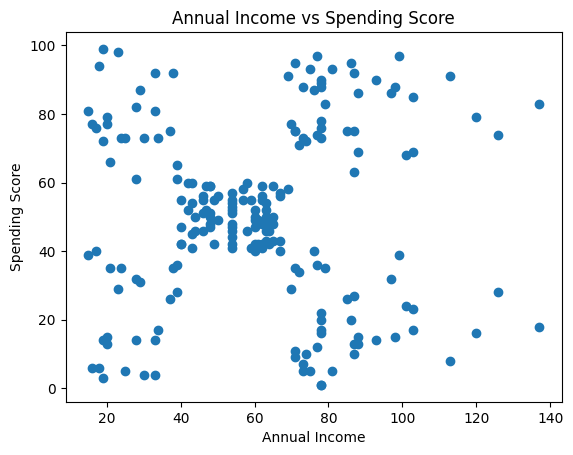

In [57]:
#visualize the original data
plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")

In [59]:
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(X_cluster)

Text(0.5, 1.0, 'Customer Segment Data With KMeans')

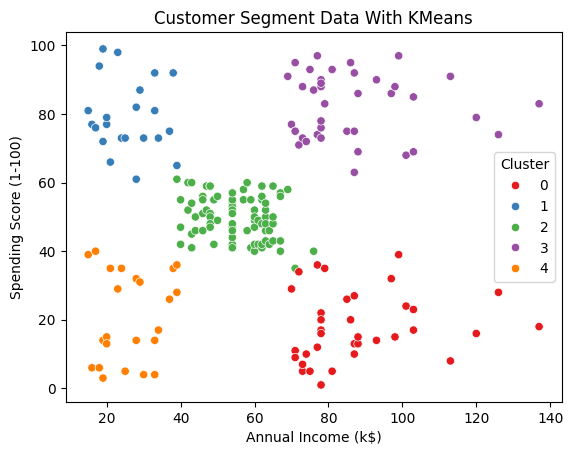

In [60]:
sns.scatterplot(x="Annual Income (k$)", y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title("Customer Segment Data With KMeans")

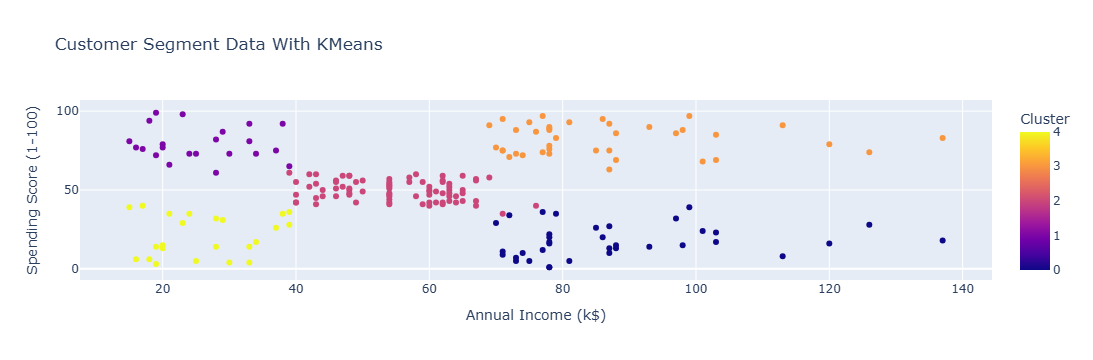

In [61]:
fig = px.scatter(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    color="Cluster",
    title="Customer Segment Data With KMeans"
)

fig.show()

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [63]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


In [78]:
features = ["Annual Income (k$)", "Spending Score (1-100)", "Cluster"]
target = "Gender"

In [79]:
X = df[features]
y = df[target]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [81]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
y_pred = model.predict(X_test)

In [83]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n:", classification_report(y_test, y_pred))

Accuracy Score: 0.575

Classification Report
:               precision    recall  f1-score   support

           0       0.57      0.81      0.67        21
           1       0.60      0.32      0.41        19

    accuracy                           0.57        40
   macro avg       0.58      0.56      0.54        40
weighted avg       0.58      0.57      0.55        40



Text(0.5, 1.0, 'Custmer Segment Cluster By Gender')

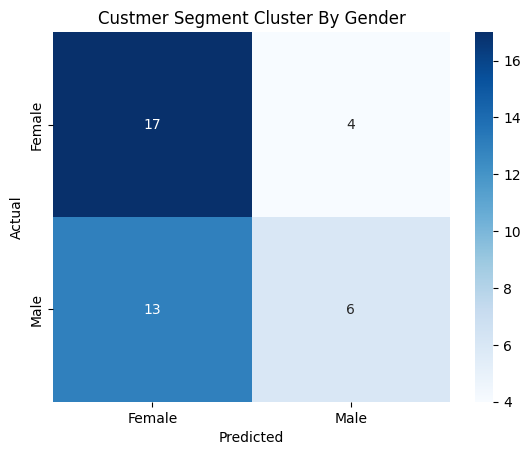

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Custmer Segment Cluster By Gender")